# **Case 1 Komputasi Statistika**

### Anggota Kelompok 9
| No. | Nama| NPM|
|:---:|-----|:---:|
|1.|Divaya Syifa Susilobudi|2106650790|
|2.|Selvira Salsabila|2106656232|
|3.|Zahrah Mahfuzah|2106704004|
|3.|Niken Salsabila Helmelia|2106724933|
|4.|Chatlea Shakira Haq|2106725116|

#**Case Study**
*The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.*

Gunakan 20 Newsgroup data berikut ([Sumber Data](https://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups)). Bagaimana kita tahu topik apa yang dibicarakan dalam dokumen 20 Newsgroups tersebut? Mari lakukan implementasi *topic modelling* pada data tersebut.

### **IMPORT MODULE**

In [ ]:
#Import Module yang Akan Digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from scipy.linalg import svd
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_colwidth", 200)

"Done"

'Done'

### **Menampilkan Data**

In [ ]:
#Load Data
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
#Menampilkan Dataset
documents[:2]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [ ]:
#Mencetak Banyaknya Dokumen
print("Total Documents: ", len(documents))

Total Documents:  11314


In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Dataset ini memiliki **11.314** dokumen teks yang didistribusikan di **20** newsgroup yang berbeda.

### **Preprocessing**

In [ ]:
#Load data dari list ke dataframe untuk diproses lebih lanjut
news_df = pd.DataFrame({'document':documents})

#Menghapus semua kecuali huruf (diantaranya tanda baca, angka, dan karakter khusus) 
#Kemudian ganti dengan ruang kosong
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

#Menghapus kata kata pendek karena biasanya tidak mengandung informasi yang berguna
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#Buat semua teks menjadi huruf kecil untuk meniadakan sensitivitas huruf dalam mempermudah preprosseing 
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

Dalam *case* ini, penting untuk menghapus *stop-words* dari data teks karena sebagian besar berantakan dan hampir tidak membawa informasi apa pun. *Stop-words* adalah istilah seperti ‘it’, ‘they’, ‘am’, ‘been’, ‘about’, ‘because’, ‘while’, 'the', dan sebagainya.

In [ ]:
#Load stopwords dari Spacy
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

#Tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

#Menghapus Stopwords
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

#de-tokenization - Menggabungkan kembali kalimat kalimatnya
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, #keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape #check shape of the document-term matrix

(11314, 1000)

In [ ]:
from sklearn.decomposition import TruncatedSVD

#SVD menampilkan dokumen dan istilah dalam vektor
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need r

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vsm = CountVectorizer(binary = False, lowercase=True, stop_words='english')
A = vsm.fit_transform(terms)

A.shape

(1000, 1000)

In [ ]:
type(A)

scipy.sparse.csr.csr_matrix

In [ ]:
A.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
print(str(vsm.vocabulary_)[:93])

{'ability': 0, 'able': 1, 'accept': 2, 'access': 3, 'according': 4, 'account': 5, 'action': 6


In [ ]:
#Solve dengan Numpy
U, s, V = np.linalg.svd(A.toarray())
print("ukuran-ukuran matriks = ",U.shape, s.shape, V.shape)
print(s)

ukuran-ukuran matriks =  (1000, 1000) (1000,) (1000, 1000)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

### **Visualisasi**

In [ ]:
#Akan kita plot hasil di atas

x_kata = X[0,:] #Baris pertama matrix V = sumbu x kata
y_kata = X[1,:] #Baris kedua matrix V = sumbu y kata

#Label dari setiap barisnya = kata-kata
#Kita akan gunakan perintah yang sama dengan di segmen sebelum ini
print(vsm.vocabulary_)

{'ability': 0, 'able': 1, 'accept': 2, 'access': 3, 'according': 4, 'account': 5, 'action': 6, 'actions': 7, 'actual': 8, 'actually': 9, 'added': 10, 'addition': 11, 'additional': 12, 'address': 13, 'administration': 14, 'advance': 15, 'advice': 16, 'agencies': 17, 'agree': 18, 'algorithm': 19, 'allow': 20, 'allowed': 21, 'allows': 22, 'amendment': 23, 'america': 24, 'american': 25, 'americans': 26, 'analysis': 27, 'angeles': 28, 'anonymous': 29, 'answer': 30, 'answers': 31, 'anti': 32, 'anybody': 33, 'apparently': 34, 'appear': 35, 'appears': 36, 'apple': 37, 'application': 38, 'applications': 39, 'apply': 40, 'appreciate': 41, 'appreciated': 42, 'approach': 43, 'appropriate': 44, 'april': 45, 'arab': 46, 'archive': 47, 'area': 48, 'areas': 49, 'aren': 50, 'argument': 51, 'arguments': 52, 'armenia': 53, 'armenian': 54, 'armenians': 55, 'arms': 56, 'army': 57, 'article': 58, 'articles': 59, 'asked': 60, 'asking': 61, 'assume': 62, 'assuming': 63, 'atheism': 64, 'atheists': 65, 'attack'

In [ ]:
idx_kata = dict(map(reversed, vsm.vocabulary_.items()))
Label = [idx_kata[i] for i in range(A.shape[0])]
print(Label)

['ability', 'able', 'accept', 'access', 'according', 'account', 'action', 'actions', 'actual', 'actually', 'added', 'addition', 'additional', 'address', 'administration', 'advance', 'advice', 'agencies', 'agree', 'algorithm', 'allow', 'allowed', 'allows', 'amendment', 'america', 'american', 'americans', 'analysis', 'angeles', 'anonymous', 'answer', 'answers', 'anti', 'anybody', 'apparently', 'appear', 'appears', 'apple', 'application', 'applications', 'apply', 'appreciate', 'appreciated', 'approach', 'appropriate', 'april', 'arab', 'archive', 'area', 'areas', 'aren', 'argument', 'arguments', 'armenia', 'armenian', 'armenians', 'arms', 'army', 'article', 'articles', 'asked', 'asking', 'assume', 'assuming', 'atheism', 'atheists', 'attack', 'attempt', 'author', 'authority', 'available', 'average', 'avoid', 'away', 'background', 'base', 'baseball', 'based', 'basic', 'basically', 'basis', 'begin', 'beginning', 'belief', 'beliefs', 'believe', 'best', 'better', 'bible', 'bike', 'bios', 'bits'

In [ ]:
X_topics = svd_model.fit_transform(X)
embedding = TSNE(n_components=2).fit_transform(X_topics)

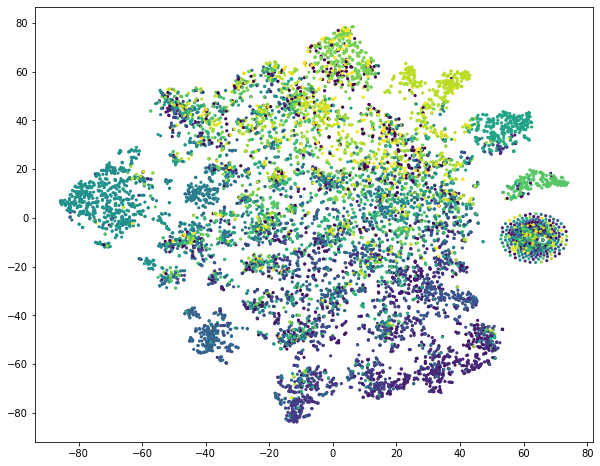

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, #size
edgecolor='none')
plt.show()

### **PENJELASAN SINGKAT**

Dalam *case* 1 ini, kami menggunakan data set **20 Newsgroup** dan akan dicari topik apa yang dibicarakan dalam dokumen 20 Newsgroups tersebut dengan menggunakan Topic Modelling seperti yang telah diajarkan sebelumnya.

Yang pertama kami lakukan adalah meng-*import* modul-modul yang akan digunakan seperti, *numpy, pandas, matplotlib.pyplot*, *seaborn*, dan sebagainya. Setelah ditampilkan data setnya kita ketahui bahwa data set ini memiliki 11.314 dokumen teks yang didistribusikan di 20 newsgroup yang berbeda.

Selanjutnya, dilakukan preprocessing untuk menghapus kata-kata yang tidak penting dan memang tidak membawa informasi apapun dalam data set. Untuk menghapus *stop-words* dari dokumen, dilakukan *tokenize* teks, yaitu, membagi string teks menjadi token atau kata-kata individual.

Kemudian, baru lah dilakukan *Topic Modelling* dengan codes sesuai dengan Panduan Latihan 1 hingga ditemukan topik-topik berikut: <br>
**Topic 0**: like know people think good time thanks  
**Topic 1**: thanks windows card drive mail file advance  
**Topic 2**: game team year games season players good  
**Topic 3**: drive scsi hard disk card drives problem  
**Topic 4**: windows file window files program problem version  
**Topic 5**: government space chip mail information data encryption  
**Topic 6:** like bike chip sounds know looks look  
**Topic 7**: card sale video monitor offer price jesus  
**Topic 8**: know card chip video government people clipper  
**Topic 9**: good know time bike problem jesus work  
**Topic 10**: think good chip clipper need encryption people  
**Topic 11**: thanks problem right bike good window time  
**Topic 12**: good people windows know sale file files  
**Topic 13**: space think know nasa problem year israel  
**Topic 14**: space good card thanks people year nasa  
**Topic 15**: people problem game window time work want  
**Topic 16**: problem good window israel people know israeli  
**Topic 17**: file time problem need files mail game  
**Topic 18**: need right file card files want good  
**Topic 19**: need time windows want israel window israeli  

Untuk mengetahui seberapa berbeda topiknya, kita harus memvisualisasikannya. Dalam hal ini, akan digunakan visualisasi **t-SNE** sesuai dengan panduannya. Sehingga diperoleh hasil visualisasi seperti yang ditunjukkan pada gambar di atas. Dapat dilihat bahwa setiap titik mewakili dokumen dan warna mewakili 20 newsgroup.